<a href="https://colab.research.google.com/github/liz-lewis-manchester/CNM_2025_group_02/blob/Question-3/G2_modelling_pollutant_transport.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

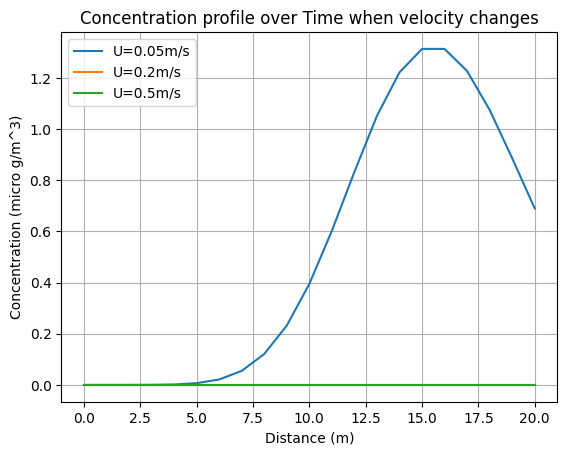

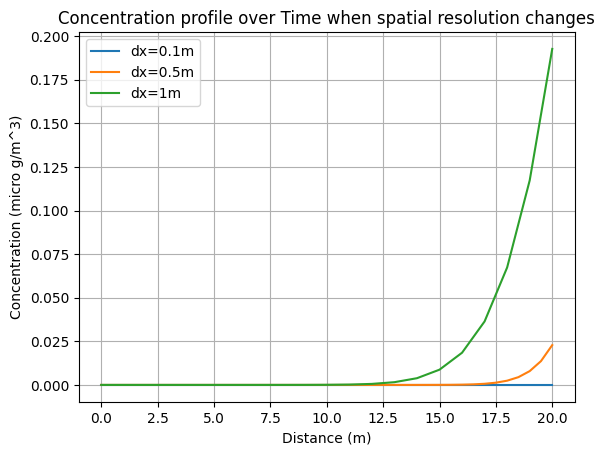

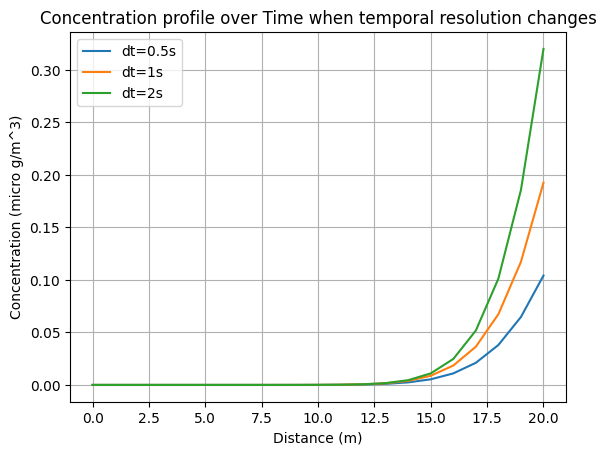

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def initialise_concentration_delta(x, value=250):
  theta0=np.zeros_like(x)
  theta0[0]=value
  return theta0
def solve_advection(x_grid,t_grid,theta0, U):
  dx=x_grid[1]-x_grid[0]
  dt=t_grid[1]-t_grid[0]
  theta=np.zeros((len(t_grid),len(x_grid)))
  theta[0,:]=theta0
  nx=len(x_grid)
  nt=len(t_grid)
  for n in range (nt-1):
    for i in range(1,nx):
      theta[n+1,i]=theta[n,i]-U*dt/dx*(theta[n,i]-theta[n,i-1])
    theta[n+1,0]=0
  return theta

# Q3 asks to test how the model results would change, when the parameters of dx,
# dt and U are varied Change the velocity parameter first
def sens_velocity(x_grid,t_grid,theta0):
  velocity=[0.05, 0.2, 0.5] # Tests the cases for slow, medium and fast rive flow
  plt.figure()
  for U in velocity:
    theta  = solve_advection(x_grid,t_grid,theta0,U) # Solves the advection equation
    plt.plot(x_grid,theta[-1,:], label=f"U={U}m/s")
  plt.xlabel("Distance (m)")
  plt.ylabel("Concentration (micro g/m^3)")
  plt.title("Concentration profile over Time when velocity changes")
  plt.grid(True)
  plt.legend()
  plt.show()


def sens_dx(x_max,t_max,theta0_function, U):
  spatial_resolution=[0.1, 0.5, 1]
  plt.figure()
  for dx in spatial_resolution:
    x_grid = np.arange (0, x_max+dx, dx)
    t_grid = np.arange(0,t_max+dt,dt)
    theta0 = theta0_function(x_grid)
    theta0=initialise_concentration_delta(x_grid)
    theta = solve_advection(x_grid,t_grid,theta0, U)
    plt.plot(x_grid,theta[-1,:], label=f"dx={dx}m")
  plt.xlabel("Distance (m)")
  plt.ylabel("Concentration (micro g/m^3)")
  plt.title("Concentration profile over Time when spatial resolution changes")
  plt.grid(True)
  plt.legend()
  plt.show()


def sens_dt(x_grid, t_max, dx, theta0, U):
  temporal_resolution= [0.5, 1, 2]
  plt.figure()
  for dt in temporal_resolution:
    t_grid = np.arange(0, t_max+dt,dt)
    theta = solve_advection(x_grid,t_grid,theta0, U)
    plt.plot(x_grid,theta[-1,:],label=f"dt={dt}s")
  plt.xlabel("Distance (m)")
  plt.ylabel("Concentration (micro g/m^3)")
  plt.title("Concentration profile over Time when temporal resolution changes")
  plt.grid(True)
  plt.legend()
  plt.show()

#Add the given model parameters
x_max=20
t_max=300
dx = 1
dt = 1
U = 0.1
# Create the grids for spatial and temporal values
x_grid = np.arange(0,x_max+dx,dx)
t_grid = np.arange(0,t_max+dt,dt)

theta0=initialise_concentration_delta(x_grid)

sens_velocity(x_grid,t_grid,theta0)
sens_dx(x_max,t_max,initialise_concentration_delta,U)
sens_dt(x_grid,t_max,dx,theta0,U)
